Model of a generalized Josephson Junction Array

Authors: Cliff Sun, Harshvardhan, Alexey Bezryadin

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.integrate import quad 

In [76]:
def generate_random_numbers(n):
    random_numbers = [random.random() for _ in range(n)]
    return random_numbers

# Example: Generate 5 random numbers
num_of_junctions = 100
random_numbers = np.sort(generate_random_numbers(2 * num_of_junctions))

In [77]:
arrayOfJunctions = [0, 0.2, 0.4, 0.6, 0.9, 1] # Where the junctions are located; must be even amount of junctions (includes 0 and 1)
# arrayOfJunctions = random_numbers
arrayOfJunctions = [0, 0.001, 0.25, 0.251, 0.5, 0.501, 0.75, 0.751, 0.999, 1]
# arrayOfJunctions = [0, 0.001, 0.999, 1]
print(arrayOfJunctions)

[0, 0.001, 0.25, 0.251, 0.5, 0.501, 0.75, 0.751, 0.999, 1]


In [78]:
critical_currents_density = np.ones(int(len(arrayOfJunctions) / 2)) # all the critical currents for each junction (Critical Currents are assumed to be 1 by default)

criticalCurrents = []

junctionWidths = []

for i in range(len(arrayOfJunctions)//2):
    junctionWidths.append(arrayOfJunctions[2*i+1] - arrayOfJunctions[2*i])

for i in range (len(junctionWidths)):
    criticalCurrents.append(junctionWidths[i] * critical_currents_density[i])

print(criticalCurrents)

print(np.sum(criticalCurrents))

[0.001, 0.0010000000000000009, 0.0010000000000000009, 0.0010000000000000009, 0.0010000000000000009]
0.005000000000000004


prints out the elements in the junction in a better format

In [79]:
index = 0
while (index < (len(arrayOfJunctions) - 1)):
    if (index == len(arrayOfJunctions) - 2):
        print(str(arrayOfJunctions[index]) + " - " + str(arrayOfJunctions[index + 1]), end = " ")
    else:
        print(str(arrayOfJunctions[index]) + " - " + str(arrayOfJunctions[index + 1]) + ",", end = " ")
    index += 2

0 - 0.001, 0.25 - 0.251, 0.5 - 0.501, 0.75 - 0.751, 0.999 - 1 

Parameters for Current -> Magnetic Field, Junction Locations, Critical Currents, Initial Phase Difference

B is the integer value of flux quanta present in the SQUID

In [80]:
def current(B, arrJ, arrC, y, numOfSegments): # y is initial phase difference of the whole circuit, B is the magnetic field, arrJ is the location of junctions, arrC is critical current associated with each junction
    curr = 0 # summation of all currents in the entire junction
    limit = int(len(arrJ) / 2) # number of junctions in the SQUID
    for n in range(limit):
        sizeOfSegment = float((arrJ[2 * n + 1] - arrJ[2 * n]) / numOfSegments)
        for i in range(numOfSegments):
            curr += arrC[n] * np.sin(y + (2 * np.pi * B) * (arrJ[2 * n] + i * sizeOfSegment)) * (1/numOfSegments)

    # phase difference evolves according to 2 * pi * B

    # curr += (critical current element in array)(sin(y + (2 * pi * B) * length)
    return curr

In [81]:
def maxCurrent(B, arrayJ, arrayC, segments): # Spits out the maximum current by varying the gauge invariant phase of the left end (free parameter) gamma
    Y=np.linspace(0, 2*np.pi, 150)
    dummyArray=[]
    for gamma in Y:
        dummyArray.append(current(B, arrayJ, arrayC, gamma, segments))
    return max(dummyArray)

In [82]:
MagField = np.linspace(-10, 10, 10000) # an array of Magnetic Fields ranging from 0 to 100 with 5000 total elements

The 2 lines below is where the useful section of the code is for modeling a SQUID

In [83]:
IMaxPoint = []

In [84]:
segments = 5

In [85]:
length = len(MagField)
for i in range(length):
    IMaxPoint.append(maxCurrent(MagField[i], arrayOfJunctions, criticalCurrents, segments) / np.sum(criticalCurrents)) # This integer represents the number of segments you want to cut each junction up into (the higher the number, the better the approximation)

The 2 lines above is where the useful section of the code is for modeling a SQUID

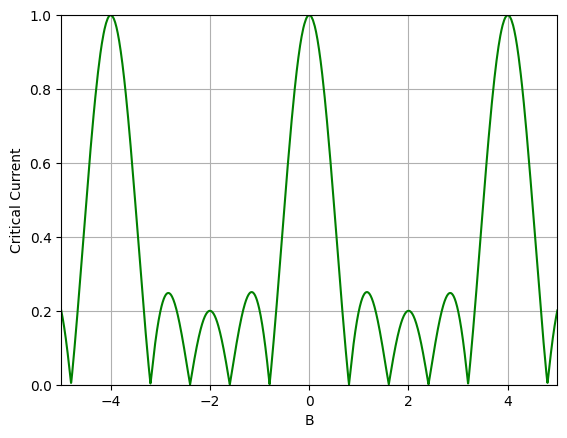

In [86]:
plt.plot(MagField, IMaxPoint, 'g-')
plt.xlabel('B')
plt.ylabel('Critical Current')  
plt.ylim(0,1) 
plt.xlim(-5,5)
plt.grid()            
plt.show()
# plt.savefig('10-random-junctions:B=-5to5.png')

In [87]:
print(max(IMaxPoint))

0.9999772054717483


In [88]:
print(min(IMaxPoint))

0.000939082159062123


In [89]:
print(np.mean(junctionWidths))

0.0010000000000000007


In [90]:
print(np.std(junctionWidths))

3.4964469463373517e-19


In [91]:
diff = []

for n in range(int(len(IMaxPoint)/2)):
    diff.append(np.abs(IMaxPoint[int(len(MagField)/2)-n] - IMaxPoint[int(len(MagField)/2)+n]))

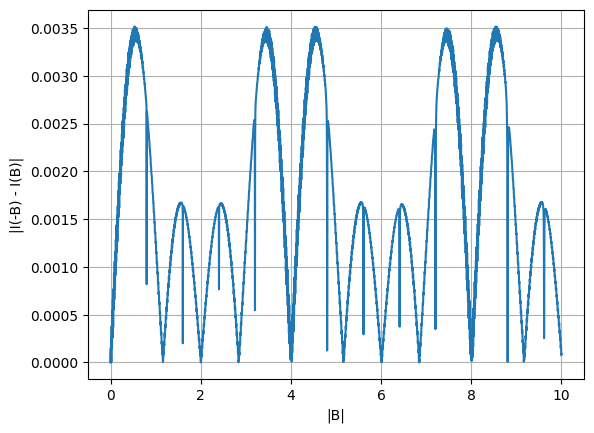

In [92]:
plt.plot(MagField[int(len(MagField)/2):], diff)
plt.xlabel('|B|')
plt.ylabel('|I(-B) - I(B)|')
# plt.ylim(0,1)
plt.grid()
plt.show()